In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
nikkei=web.DataReader("NIKKEI225","fred","1980/1/5")
nikkei.to_csv('nikkei.csv')

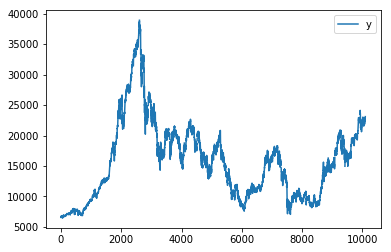

<Figure size 9000x9000 with 0 Axes>

In [3]:
from pylab import rcParams
df = pd.read_csv('nikkei.csv')
res = np.array(df)
time_stamp = res[:, 0].reshape(len(res), 1)
close_price = res[:, 1].reshape(len(res), 1)
tmp_data = np.hstack((time_stamp, close_price))
data = pd.DataFrame(tmp_data, columns=['ds', 'y'])
data.plot(figsize=(30,10))
plt.figure(dpi=300)
plt.show()

In [4]:
from fbprophet import Prophet

model = Prophet()
model.fit(data)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future_data = model.make_future_dataframe(periods=15000, freq='h')
future_data = future_data[future_data['ds'].dt.weekday < 5]
forecast_data = model.predict(future_data) #予測

In [8]:
%matplotlib
predicted = model.plot(forecast_data)
plt.show()

Using matplotlib backend: Qt5Agg


TypeError: show() got an unexpected keyword argument 'figsize'